In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import dataprob
import copy
import linkage
import time
from scipy.stats import qmc
import warnings
import matplotlib.pyplot as mpl
from IPython.display import clear_output
import os
import logging

#### Load experimental data

In [2]:
#### Load Experimental Data

## EDTA --> Buffer

cell_vol = 201.3

## EDTA --> Buffer

edtablank1 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240806\4mMEDTAinto0uMCa2.csv",
                                        cell_contents={"CT":0},
                                        syringe_contents={"ET":4e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="ET")
edtablank1.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

edtablank2 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240806\4mMEDTAinto0uMCa3.csv",
                                        cell_contents={"CT":0},
                                        syringe_contents={"ET":4e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="ET")
edtablank2.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

## Ca --> Buffer

cablank1 = linkage.experiment.Experiment(r"S:\Harmslab\ITC2\20241220\1mMCatobuffer.csv",
                                        cell_contents={"ET":0},
                                        syringe_contents={"CT":1e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="CT")
cablank1.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

cablank2 = linkage.experiment.Experiment(r"S:\Harmslab\ITC2\20241220\1mMCatobuffer2.csv",
                                        cell_contents={"ET":0},
                                        syringe_contents={"CT":1e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="CT")
cablank2.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

## EDTA --> Ca

edtaca1 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20241001\3mMEDTAto500uMCa.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca1.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")


edtaca3 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240915\3p5mMEDTAto500uMCaCl2lowres.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca3.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")


edtaca4 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240913\3p5mMEDTAto500uMCaLOWRES.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca4.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

edtaca5 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca5.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

edtaca6 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2_2.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca6.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

edtaca7 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2_3.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca7.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

#5/6 bad, WHY?



#### Create a linkage model

In [3]:
expt_list = [cablank1, cablank2, edtablank1, edtablank2, edtaca1, edtaca3, edtaca4, edtaca5, edtaca6, edtaca7] 

gm = linkage.GlobalModel(model_name="CaEDTA",
                         expt_list=expt_list)

f = dataprob.setup(gm.model_normalized,
                   vector_first_arg=True,
                   method="ml",
                   fit_parameters=gm.parameter_names)

f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
KE,KE,0.0,False,-inf,inf,NaN,NaN
dH_E,dH_E,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_0_CT_fudge,nuisance_expt_0_CT_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_1_CT_fudge,nuisance_expt_1_CT_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_2_ET_fudge,nuisance_expt_2_ET_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_3_ET_fudge,nuisance_expt_3_ET_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,0.0,False,-inf,inf,NaN,NaN


#### Do fit

In [13]:
# Parameters

f.param_df.loc["KE","guess"] = 13
f.param_df.loc["KE","upper_bound"] = 20
f.param_df.loc["KE","lower_bound"] = 5
f.param_df.loc["KE","fixed"] = False

f.param_df.loc["dH_E","guess"] = -11970
f.param_df.loc["dH_E","upper_bound"] = -11500
f.param_df.loc["dH_E","lower_bound"] = -12000
f.param_df.loc["dH_E","fixed"] = False

# Get all parameter names containing 'nuisance_expt' and 'ET_fudge'
fudge_params = [col for col in f.param_df.index if 'nuisance_expt' in col]

# Link all fudge parameters (except 0) to the first one
for param in fudge_params:
        f.param_df.loc[param, 'guess'] = 1.1
        f.param_df.loc[param, 'fixed'] = True
        f.param_df.loc[param, 'lower_bound'] = -2
        f.param_df.loc[param, 'upper_bound'] = 2

f.param_df.loc["nuisance_dil_CT","upper_bound"] = 200
f.param_df.loc["nuisance_dil_CT","lower_bound"] = -400

f.param_df.loc["nuisance_dil_ET","upper_bound"] = 200
f.param_df.loc["nuisance_dil_ET","lower_bound"] = -200



In [14]:
f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
KE,KE,13.0,False,5.0,20.0,NaN,NaN
dH_E,dH_E,-11970.0,False,-12000.0,-11500.0,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,0.0,False,-400.0,200.0,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,0.0,False,-200.0,200.0,NaN,NaN
nuisance_expt_0_CT_fudge,nuisance_expt_0_CT_fudge,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_1_CT_fudge,nuisance_expt_1_CT_fudge,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_2_ET_fudge,nuisance_expt_2_ET_fudge,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_3_ET_fudge,nuisance_expt_3_ET_fudge,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.1,True,-2.0,2.0,NaN,NaN


In [15]:
# Run fit

f.fit(
      y_obs=gm.y_obs_normalized,
      y_std=gm.y_std_normalized,
      #max_convergence_cycles=2,
      #use_ml_guess=False,
      #num_steps=100,
      #num_walkers=800, # number of markov chains to use in the analysis, default=100       
      method='trf',  # Algorithm to use for optimization
      jac='3-point',  # Method for computing the Jacobian matrix
      ftol=1e-15,  # Tolerance for termination by the change of the cost function
      xtol=1e-15,  # Tolerance for termination by the change of the independent variables
      gtol=1e-15,  # Tolerance for termination by the norm of the gradient
      x_scale='jac',  # Scaling of the variables
      #loss='arctan',  # Loss function for dealing with outliers
      #f_scale=0.01  # Soft margin between inlier and outlier residuals
      max_nfev=100,  # Maximum number of function evaluations
      verbose=2  # Level of algorithm's verbosity
     )

f.fit_df

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0910e+13                                    7.64e+13    
       1              2         1.6575e+12      9.25e+12       1.41e+02       1.30e+13    
       2              3         4.6221e+11      1.20e+12       1.16e+02       2.03e+12    
       3              4         2.9405e+11      1.68e+11       1.58e+02       2.83e+11    
       4              5         2.7383e+11      2.02e+10       1.16e+02       1.84e+10    
       5              6         2.7044e+11      3.39e+09       1.15e+02       1.25e+09    
       6              7         2.6955e+11      8.95e+08       4.07e+01       1.57e+09    
       7              8         2.6950e+11      5.00e+07       2.38e+00       1.44e+09    
       8              9         2.6950e+11      9.94e+05       1.58e-01       1.67e+08    
       9             10         2.6950e+11      1.80e+04       5.67e-02       2.00e+08    

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
KE,KE,16.433181,0.000005,16.433172,16.433190,13.0,False,5.0,20.0,NaN,NaN
dH_E,dH_E,-11500.000000,0.011240,-11500.022116,-11499.977884,-11970.0,False,-12000.0,-11500.0,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,-400.000000,0.004633,-400.009117,-399.990883,0.0,False,-400.0,200.0,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,32.828868,0.000373,32.828135,32.829602,0.0,False,-200.0,200.0,NaN,NaN
nuisance_expt_0_CT_fudge,nuisance_expt_0_CT_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_1_CT_fudge,nuisance_expt_1_CT_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_2_ET_fudge,nuisance_expt_2_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_3_ET_fudge,nuisance_expt_3_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN


In [16]:
#f.fit_quality

#### Plot results

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
KE,KE,16.433181,0.000005,16.433172,16.433190,13.0,False,5.0,20.0,NaN,NaN
dH_E,dH_E,-11500.000000,0.011240,-11500.022116,-11499.977884,-11970.0,False,-12000.0,-11500.0,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,-400.000000,0.004633,-400.009117,-399.990883,0.0,False,-400.0,200.0,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,32.828868,0.000373,32.828135,32.829602,0.0,False,-200.0,200.0,NaN,NaN
nuisance_expt_0_CT_fudge,nuisance_expt_0_CT_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_1_CT_fudge,nuisance_expt_1_CT_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_2_ET_fudge,nuisance_expt_2_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_3_ET_fudge,nuisance_expt_3_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.100000,NaN,NaN,NaN,1.1,True,-2.0,2.0,NaN,NaN


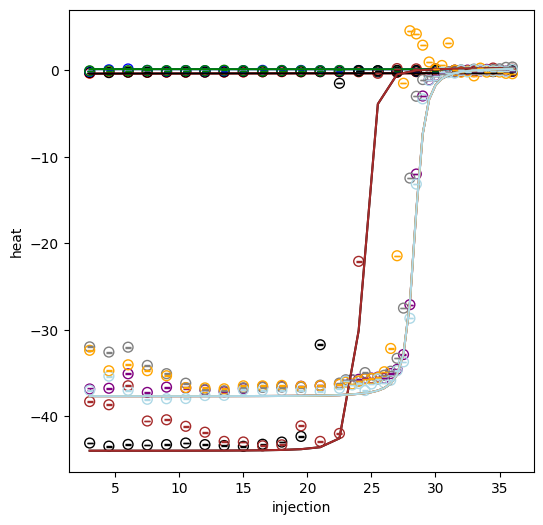

In [17]:
style = {"s":50,
         "facecolor":"none",
         "edgecolor":"black"}
err_style = {"lw":0,
             "elinewidth":1,
             "capsize":2}


color_order = ["red","black", "blue", "green", "purple", "black", "brown", "gray", "orange", "lightblue", "lightgreen"]


fig, ax = plt.subplots(1,figsize=(6,6))
out_df = gm.as_df.copy()
y_calc = gm.model(np.array(f.fit_df["estimate"]))
for i in np.unique(out_df.expt_id):
    
    style["edgecolor"] = color_order[i]
    err_style["color"] = color_order[i]
    mask = out_df["expt_id"] == i
    this_df = out_df.loc[mask,:]
    
    x_values = np.cumsum(this_df["injection"])[1:]  # Skip first point
    y_values = np.array(this_df["y_obs"])[1:]       # Skip first point
    y_err = np.array(this_df["y_std"])/np.mean(this_df["injection"])
    y_err = y_err[1:]                               # Skip first point
    this_y_calc = y_calc[mask]/this_df["injection"]
    this_y_calc = this_y_calc[1:]                   # Skip first point 
    y_values = y_values/this_df["injection"][1:]    # Skip first point
    
    ax.scatter(x_values,y_values,**style)
    ax.errorbar(x=x_values,
                y=y_values,
                yerr=y_err,
                **err_style)
    ax.plot(x_values,this_y_calc,'-',color=color_order[i])
    
plt.xlabel("injection")
plt.ylabel("heat")
f.fit_df

In [ ]:
fig = dataprob.plot_corner(f)

In [ ]:
fig = dataprob.plot_summary(f)
